In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pystan
import arviz as az

import bandit

In [2]:
import logging
logging.getLogger("pystan").setLevel("ERROR")

In [3]:
band = bandit.Bandit()
band

<One-Armed-Bandit::f0x7f852f02fc70>

In [4]:
n_obs = 1_000

In [5]:
obs = np.array([
    band.draw() for _ in range(n_obs)
])
wins = obs.sum()

print(f"observed win % = {wins / n_obs:.4f}")
print(f"real val of p  = {band._p:.4f}")

observed win % = 0.6860
real val of p  = 0.6906


In [6]:
bandit_model = """
data {
    int n_obs;
    int wins;
}

parameters {
    real<lower=0, upper=1.0> p;
}

model {
    wins ~ binomial(n_obs,p);
}
"""

In [7]:
model = pystan.StanModel(model_code=bandit_model,verbose=False)

In [8]:
samples = model.sampling(
    data=dict(n_obs=n_obs, wins=wins)
)
samples

Inference for Stan model: anon_model_485bc3b3ce9bdbdee788e5b3d377c5b1.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.69  3.9e-4   0.02   0.66   0.67   0.69    0.7   0.71   1505    1.0
lp__ -624.3    0.02   0.74 -626.5 -624.5 -624.0 -623.8 -623.8   2115    1.0

Samples were drawn using NUTS at Wed Sep  9 17:01:56 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

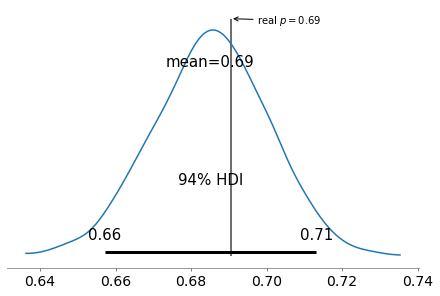

In [10]:
ax = az.plot_posterior(samples)
ymin, ymax = ax[0].get_ylim()
plt.vlines(band._p,0,ymax,alpha=0.75)
plt.annotate(
    f"real $p = {band._p:.2f}$",
    (band._p,ymax),
    (band._p*1.01,ymax*0.98),
    arrowprops={"arrowstyle":"->"},
    horizontalalignment="left"
)
plt.title("");

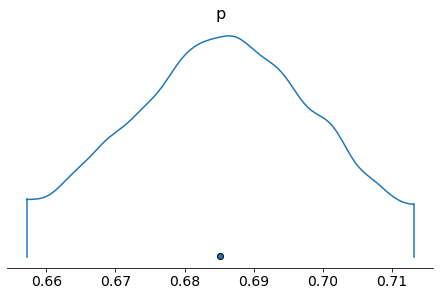

In [12]:
az.plot_density(samples);